In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset using Pandas
df = pd.read_csv('avocado.csv')

In [3]:
# Map the 'type' column to numerical values ('conventional' -> 0, 'organic' -> 1)
df['type'] = df['type'].map({'conventional': 0, 'organic': 1})

In [4]:
# One-hot encode the 'region' column and concatenate it with the dataset
region_dummies = pd.get_dummies(df['region'], prefix='region', drop_first=True)
df = pd.concat([df, region_dummies], axis=1)

In [5]:
# Drop unnecessary columns (e.g., text-based or irrelevant columns)
columns_to_drop = ['Unnamed: 0', 'Date']  # Example columns
df = df.drop(columns=columns_to_drop)

In [6]:
# Apply Label Encoding to the 'region' column
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])

In [ ]:
# Define features (X) and target variable (y)
X = df.drop(['AveragePrice'], axis=1)
y = df['AveragePrice']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [10]:
# Define the hyperparameter grid for optimization
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [11]:
# Use GridSearchCV to optimize the Decision Tree model
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Use the best model from GridSearchCV for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [12]:
# Evaluate model performance using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of samples in the test set
p = X_train.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

Decision Tree Result:
MAE: 0.13756349315068495
MSE: 0.04143171488032681
RMSE: 0.20354781964031649
R-squared: 0.742130134654452
Adjusted R-squared: 0.7375266000987714


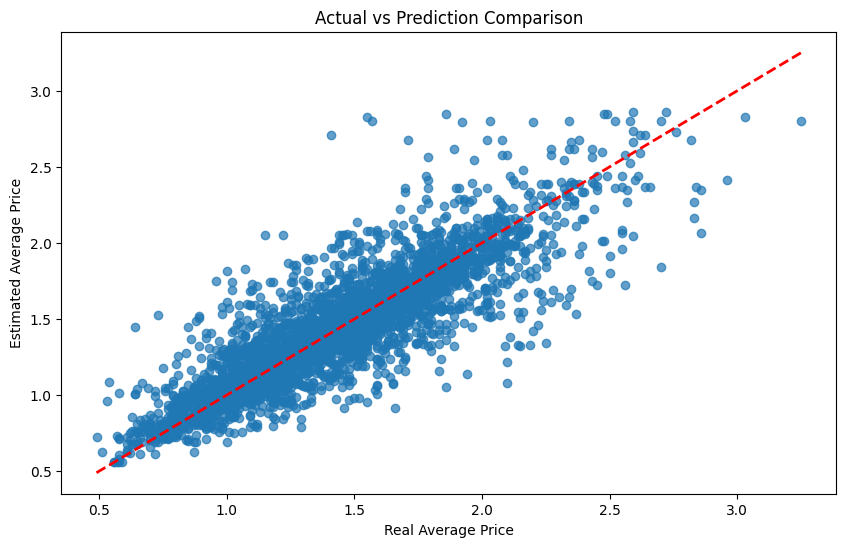

In [13]:
# Print evaluation results
print("Decision Tree Result:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

# Plot Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Real Average Price")
plt.ylabel("Estimated Average Price")
plt.title("Actual vs Prediction Comparison")
plt.show()

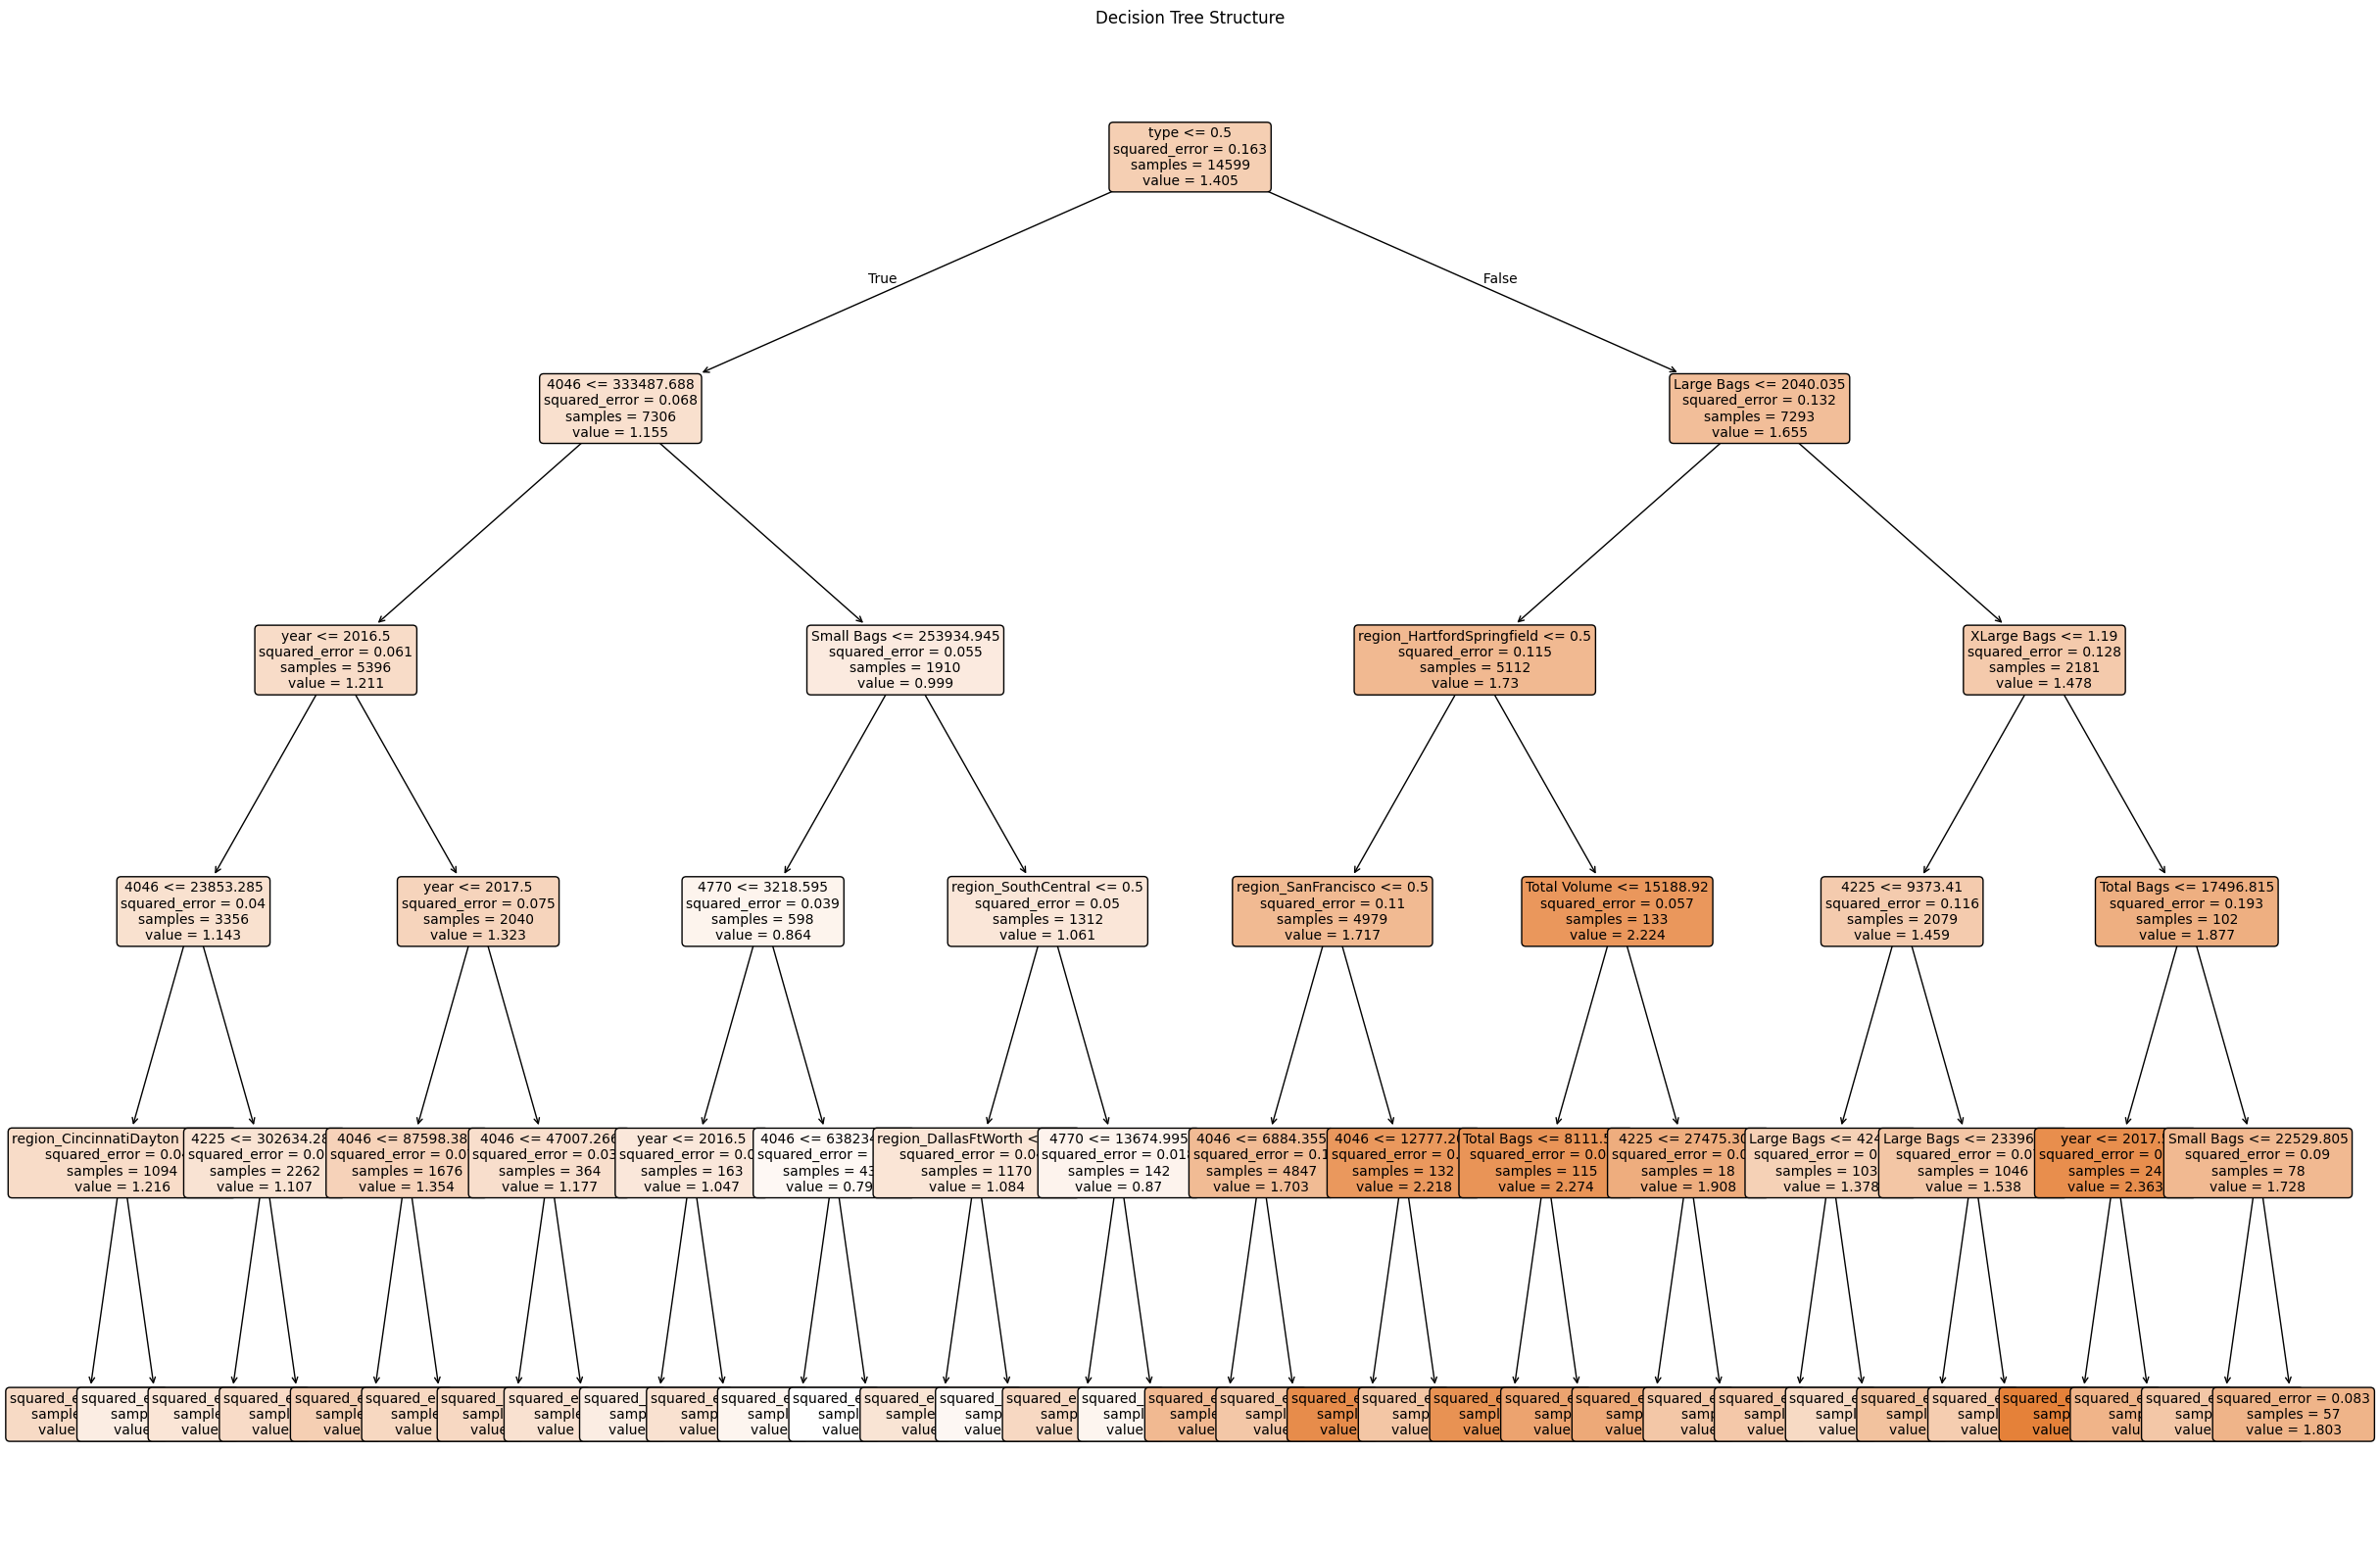

In [18]:
# Visualize the structure of the Decision Tree
from sklearn.tree import plot_tree

dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
plt.figure(figsize=(30, 20))
plot_tree(dt_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()